In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
Sim_res = Path.cwd().parent.parent / 'MagnetCode' / "Simulation Results"
Photos_dir = Path.cwd() / 'Images'
from scipy.optimize import minimize

# Сбор статистики

### 100-1200 базовое

In [2]:
DIR = Sim_res / 'Ising' / 'TrIs_Res' / 'energy'
if DIR.exists():
    dataset = list(DIR.glob('BC*.txt'))
    #print(*list(map(lambda x: x.name, dataset)), sep='\n')

In [3]:
def collect(dataset, full_data=None, sort=False):
    for d in dataset:
        data = pd.read_csv(d, sep=' ', index_col=False)
        if full_data is None:
            full_data = data
        else:
            full_data = pd.concat([full_data, data], ignore_index=True)
    if sort:
        full_data.sort_values(by=['J', 'N'], inplace=True, ignore_index=True)
    return full_data

data = collect(dataset, sort=True)

### крит-зона

In [4]:
DIR = Sim_res / 'Ising' / 'TrIs_crit' / 'energy'
dataset = list(DIR.glob('BC*.txt'))
#print(*list(map(lambda x: x.name, dataset)), sep='\n')

In [5]:
data = collect(dataset, data, True)

### Проверка 

In [6]:
data.head(5)

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,mean_e,err_mean_e,mean_e_sq,err_mean_e_sq,mean_e_fourth,err_mean_e_fourth,mean_m,err_mean_m,mean_m_sq,err_mean_m_sq,mean_m_fourth,err_mean_m_fourth,Unnamed: 19
0,100,0.0,0,929,35,96.8226,0.057610,-0.000050,0.000199,0.024398,0.000035,0.001924,7.501960e-06,0.079668,0.000060,0.010019,0.000013,0.000299,9.058660e-07,105200000000
1,300,0.0,0,4910,73,486.1900,0.358418,-0.000024,0.000089,0.006794,0.000010,0.000143,4.982520e-07,0.046045,0.000051,0.003335,0.000006,0.000033,1.204110e-07,105900000000
2,600,0.0,0,13924,120,1354.8600,1.132870,-0.000006,0.000035,0.003129,0.000002,0.000030,5.030990e-08,0.032560,0.000014,0.001667,0.000001,0.000008,1.528970e-08,482200000000
3,1200,0.0,0,39380,225,0.0000,NaN,0.000042,0.000053,0.001468,0.000002,0.000007,2.123840e-08,0.023018,0.000023,0.000833,0.000002,0.000002,7.588310e-09,373770000000
4,100,0.1,0,925,33,96.3550,0.068653,-0.163649,0.000179,0.055868,0.000100,0.008602,4.158540e-05,0.093606,0.000074,0.013780,0.000021,0.000562,1.830520e-06,95900000000


# Графики

### $\langle e \rangle / J$

In [21]:
data['mean_e_div_J'] = data['mean_e'] / data['J']
data['err_mean_e_div_J'] = data['err_mean_e'] / data['J']

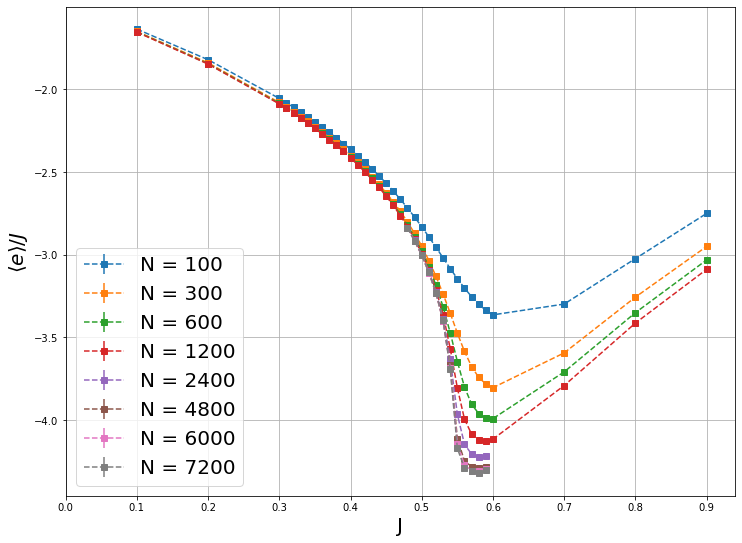

In [22]:
x = 'J'
y_name = 'mean_e_div_J'
ye_name = 'err_mean_e_div_J'

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for n in Ns:
    dataN = data[(data.N == n) & (data.J > 0)]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
    
#axins=ax.inset_axes([0.05, 0.5, 0.3, 0.45])
#for n in Ns:
#    dataN = data[(data.N == n) & (data.J > 0)]
#    axins.errorbar(x='J', y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
#x1, x2, y1, y2 = 0.407, 0.435, 0.99, 1.25
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#axins.set_xticks(np.linspace(x1, x2, 6))
#axins.tick_params(direction='in')
#axins.set_xticklabels([])
#axins.set_yticklabels([])
#ax.indicate_inset_zoom(axins, edgecolor="black", label='')


plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle e \rangle / J$', fontsize=20)
plt.legend(loc=3, fontsize=20);
plt.xticks(np.linspace(0,0.9,10));
plt.grid();

### $\langle e \rangle$

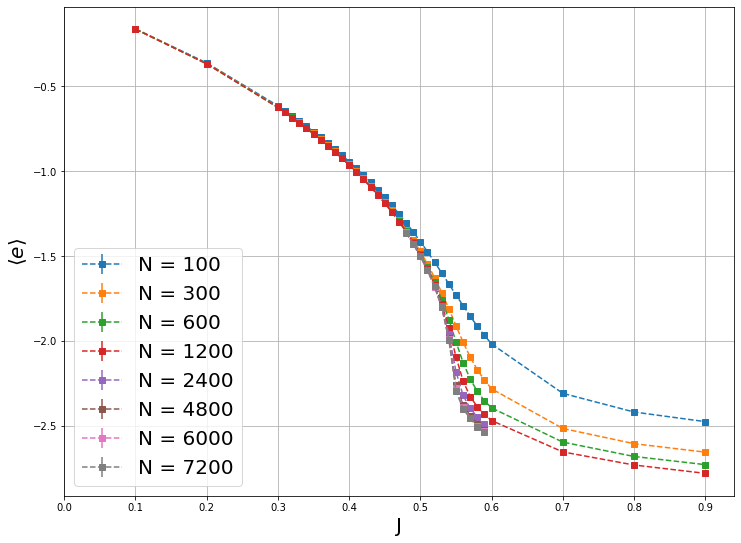

In [24]:
x = 'J'
y_name = 'mean_e'
ye_name = 'err_mean_e'

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for n in Ns:
    dataN = data[(data.N == n) & (data.J > 0)]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
    
#axins=ax.inset_axes([0.05, 0.5, 0.3, 0.45])
#for n in Ns:
#    dataN = data[(data.N == n) & (data.J > 0)]
#    axins.errorbar(x='J', y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
#x1, x2, y1, y2 = 0.407, 0.435, 0.99, 1.25
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#axins.set_xticks(np.linspace(x1, x2, 6))
#axins.tick_params(direction='in')
#axins.set_xticklabels([])
#axins.set_yticklabels([])
#ax.indicate_inset_zoom(axins, edgecolor="black", label='')


plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle e \rangle$', fontsize=20)
plt.legend(loc=3, fontsize=20);
plt.xticks(np.linspace(0,0.9,10));
plt.grid();

### $\langle m^2 \rangle$

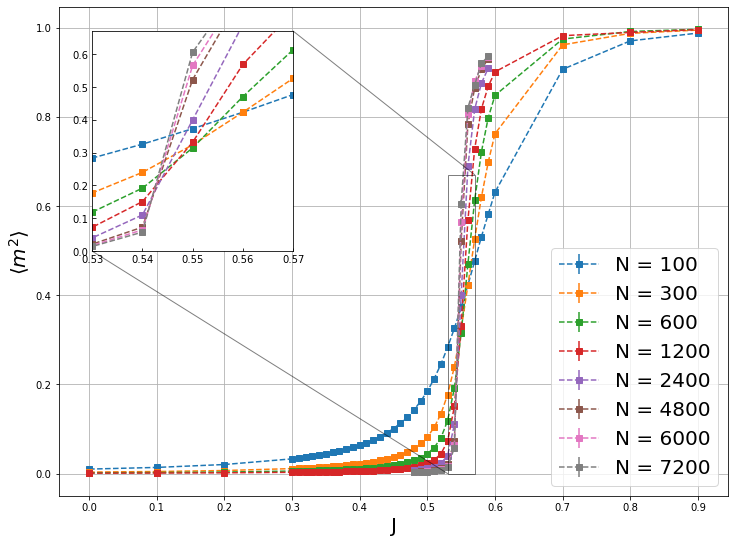

In [9]:
x = 'J'
y_name = 'mean_m_sq'
ye_name = 'err_mean_m_sq'

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for n in Ns:
    dataN = data[data.N == n]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')

axins=ax.inset_axes([0.05, 0.5, 0.3, 0.45])
for n in Ns:
    dataN = data[data.N == n]
    axins.errorbar(x='J', y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
x1, x2, y1, y2 = 0.532, 0.568, 0., 0.67
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks(np.linspace(round(x1, 2), round(x2,2), 5))
axins.tick_params(direction='in')
#axins.set_xticklabels([])
#axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black", label='')

plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle m^2 \rangle$', fontsize=20)
plt.legend(loc=4, fontsize=20);
plt.xticks(np.linspace(0,0.9,10));
plt.grid();

### Генерация ошибок для кумулянта

In [11]:
data['err_mean_m_sq']

0      0.000013
1      0.000006
2      0.000001
3      0.000002
4      0.000021
         ...   
191    0.004577
192    0.000048
193    0.000016
194    0.000005
195    0.001797
Name: err_mean_m_sq, Length: 196, dtype: float64

In [10]:
U4 = 1 - data['mean_m_fourth'] / (3 * data['mean_m_sq'] ** 2)

In [11]:
def predict_error(m4, m4_err, m2, m2_err, length=1000):
    m4_arr = np.random.normal(m4, m4_err, length)
    m2_arr = np.random.normal(m2, m2_err, length)
    U4 = 1 - m4_arr / (3 * m2_arr ** 2)
    return U4.std()

err_U4 = data.apply(lambda x: predict_error(x['mean_m_fourth'], x['err_mean_m_fourth'], x['mean_m_sq'], x['err_mean_m_sq']), axis=1)

In [12]:
data['U4'] = U4
data['err_U4'] = err_U4

In [13]:
data[data.N == 7200]['err_U4']

91     0.013387
99     0.014244
107    0.020904
115    0.017524
123    0.020875
131    0.034771
139    0.111864
147    0.010700
155    0.002239
163    0.014579
171    0.000417
179    0.002417
Name: err_U4, dtype: float64

In [14]:
data[data.N == 7200]

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,mean_e,err_mean_e,mean_e_sq,...,err_mean_m,mean_m_sq,err_mean_m_sq,mean_m_fourth,err_mean_m_fourth,Unnamed: 19,mean_e_div_J,err_mean_e_div_J,U4,err_U4
91,7200,0.48,0,336971,15605,0.0,NaN,-1.36262,0.001041,1.85787,...,0.000094,0.002535,0.000012,0.000019,1.935420e-07,212750000000,-2.838792,0.002168,-0.001972,0.013387
99,7200,0.49,0,312479,15855,0.0,NaN,-1.42950,0.001030,2.04483,...,0.000110,0.003122,0.000015,0.000029,3.044060e-07,211160000000,-2.917347,0.002101,0.002640,0.014244
107,7200,0.50,0,298548,39143,0.0,NaN,-1.50083,0.002395,2.25449,...,0.000200,0.003935,0.000031,0.000046,7.194470e-07,192620000000,-3.001660,0.004791,0.007897,0.020904
115,7200,0.51,0,242252,9962,0.0,NaN,-1.58454,0.000950,2.51216,...,0.000175,0.005327,0.000032,0.000084,1.058500e-06,188200000000,-3.106941,0.001862,0.012506,0.017524
123,7200,0.52,0,211131,9240,0.0,NaN,-1.68027,0.001331,2.82504,...,0.000257,0.007832,0.000057,0.000183,2.684480e-06,183910000000,-3.231288,0.002560,0.004241,0.020875
131,7200,0.53,0,162408,11964,0.0,NaN,-1.80038,0.002128,3.24392,...,0.000606,0.014330,0.000180,0.000611,1.553740e-05,184480000000,-3.396943,0.004016,0.008033,0.034771
139,7200,0.54,0,109316,30265,0.0,NaN,-1.99276,0.004756,3.97705,...,0.004419,0.058082,0.002462,0.009843,7.177340e-04,160650000000,-3.690296,0.008807,0.027410,0.111864
147,7200,0.55,0,48380,37007,0.0,NaN,-2.29440,0.004854,5.27060,...,0.006059,0.605510,0.007300,0.408902,7.057060e-03,77700000000,-4.171636,0.008826,0.628246,0.010700
155,7200,0.56,0,8539,2055,0.0,NaN,-2.40244,0.000910,5.77298,...,0.001298,0.820111,0.002100,0.680959,2.985440e-03,65360000000,-4.290071,0.001624,0.662515,0.002239
163,7200,0.57,0,20858,15267,0.0,NaN,-2.45588,0.007272,6.03940,...,0.013521,0.871711,0.015653,0.774120,1.606460e-02,60250000000,-4.308561,0.012758,0.660420,0.014579


### $\langle U^{4} \rangle$

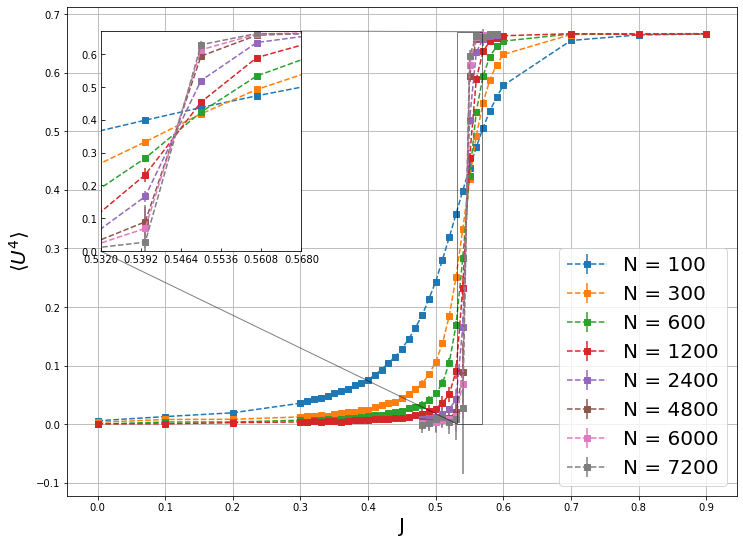

In [15]:
x = 'J'
y_name = 'U4'
ye_name = 'err_U4'

fig, ax = plt.subplots(figsize=(12,9))
Ns = data.N.unique()
for n in Ns:
    dataN = data[data.N == n]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')

axins=ax.inset_axes([0.05, 0.5, 0.3, 0.45])
for n in Ns:
    dataN = data[data.N == n]
    axins.errorbar(x='J', y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'N = {n}')
x1, x2, y1, y2 = 0.532, 0.568, 0., 0.67
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks(np.linspace(x1, x2, 6))
axins.tick_params(direction='in')
#axins.set_xticklabels([])
#axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black", label='')


plt.xlabel('J', fontsize=20)
plt.ylabel(r'$\langle U^4 \rangle$', fontsize=20)
plt.legend(loc=4, fontsize=20);
plt.xticks(np.linspace(0,0.9,10));
plt.grid();

### $R^2(N)$ log

In [8]:
data

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,mean_e,err_mean_e,mean_e_sq,err_mean_e_sq,mean_e_fourth,err_mean_e_fourth,mean_m,err_mean_m,mean_m_sq,err_mean_m_sq,mean_m_fourth,err_mean_m_fourth,Unnamed: 19
0,100,0.0,0,929,35,96.8226,0.057610,-0.000050,0.000199,0.024398,0.000035,0.001924,7.501960e-06,0.079668,0.000060,0.010019,0.000013,0.000299,9.058660e-07,105200000000
1,300,0.0,0,4910,73,486.1900,0.358418,-0.000024,0.000089,0.006794,0.000010,0.000143,4.982520e-07,0.046045,0.000051,0.003335,0.000006,0.000033,1.204110e-07,105900000000
2,600,0.0,0,13924,120,1354.8600,1.132870,-0.000006,0.000035,0.003129,0.000002,0.000030,5.030990e-08,0.032560,0.000014,0.001667,0.000001,0.000008,1.528970e-08,482200000000
3,1200,0.0,0,39380,225,0.0000,NaN,0.000042,0.000053,0.001468,0.000002,0.000007,2.123840e-08,0.023018,0.000023,0.000833,0.000002,0.000002,7.588310e-09,373770000000
4,100,0.1,0,925,33,96.3550,0.068653,-0.163649,0.000179,0.055868,0.000100,0.008602,4.158540e-05,0.093606,0.000074,0.013780,0.000021,0.000562,1.830520e-06,95900000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1200,0.8,0,1290,673,0.0000,NaN,-2.731040,0.003891,7.461570,0.018833,55.748400,2.253700e-01,0.993283,0.003589,0.989202,0.004577,0.982267,5.394660e-03,126850000000
192,100,0.9,0,57,8,24.2203,0.017195,-2.475780,0.000106,6.135850,0.000520,37.800800,6.265000e-03,0.993601,0.000029,0.987767,0.000048,0.977151,7.829090e-05,62400000000
193,300,0.9,0,162,12,69.1092,0.057288,-2.655440,0.000066,7.053010,0.000351,49.791400,4.928130e-03,0.997209,0.000008,0.994465,0.000016,0.989106,3.071290e-05,61100000000
194,600,0.9,0,304,22,134.5270,0.090086,-2.728860,0.000036,7.447410,0.000198,55.486300,2.940810e-03,0.998116,0.000002,0.996246,0.000005,0.992549,9.059410e-06,262000000000


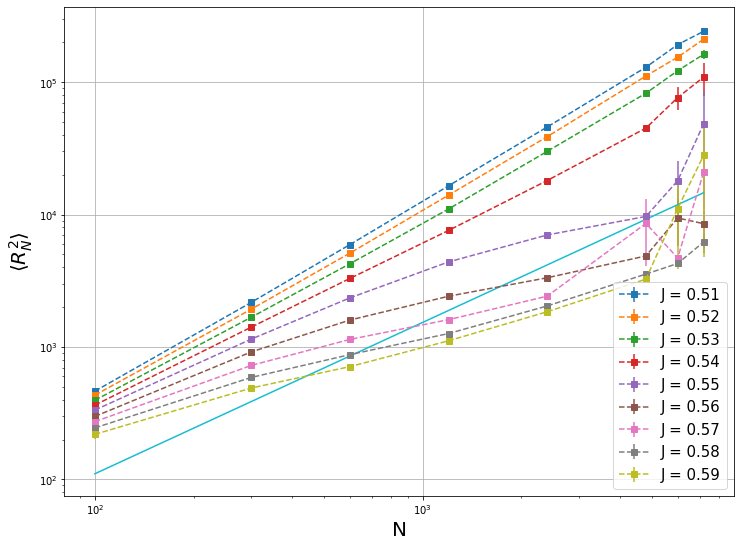

In [21]:
x = 'N'
y_name = 'mean_R_sq'
ye_name = 'err_mean_R_sq'

fig, ax = plt.subplots(figsize=(12,9))
Js = data[(data.J > 0.5) & (data.J < 0.6)].J.unique()
Ns = data.N.unique()
for j in Js:
    dataN = data[data.J == j]
    ax.errorbar(x=x, y=y_name, yerr=ye_name, fmt='s--', data=dataN, label=f'J = {j}')

plt.xlabel('N', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.plot(Ns, 4/7 * Ns ** (2 * 4/7))
plt.ylabel(r'$\langle R^2_N \rangle$', fontsize=20)
plt.legend(loc=4, fontsize=15);
plt.grid();